# Fiber Frame

[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [1]:
import elle.numeric
import matplotlib.pyplot as plt
plt.style.use("typewriter")

In [2]:
import anon.conf
anon.conf.config.update('jax_disable_jit', True)
anon.conf.config.update('jax_enable_x64', True)
import anabel
import anon
import jax
import anon.atom as anp
import elle.sections
import elle.beam2d
import elle.springs
import anabel as em
mat = elle.springs.isokin.no1(3600.0,4.0,H0=1.0)
# mat = elle.springs.gmp.no5(60.0,29e3)
GirderSec = anabel.sections.Tee
ColumnSec = anabel.sections.Rectangle
geom_template = elle.beam2d.transform_no2(elle.beam2d.geom_no1)
beam_template = elle.beam2d.resp_no6

An `Assembler` is an object with an `.assemble()` and optionally a `.compose()` method

In [3]:
# Create a model Assembler
model = em.SkeletalModel(ndm=2,ndf=3)

# Define problem parameters
P1 = model.param("P1")

# Define model components
girder_section = GirderSec(d=24.0, bf=60.0, tf=6.0, tw=18.0, mat=mat).assemble()
column_section = ColumnSec(d=30.0, b=30.0,mat=mat).assemble()
basic_girder  = beam_template(*[girder_section]*4, quad={"n": 4, "rule": "lobatto"})
# basic_column  = beam_template(*[column_section]*8, quad={"n": 4, "rule": "mid"})
basic_column = elle.beam2d.resp_no1(A=30.0**2,E=3600.0,I=30**4/12)

girder = geom_template(basic_girder)
column = geom_template(basic_column)

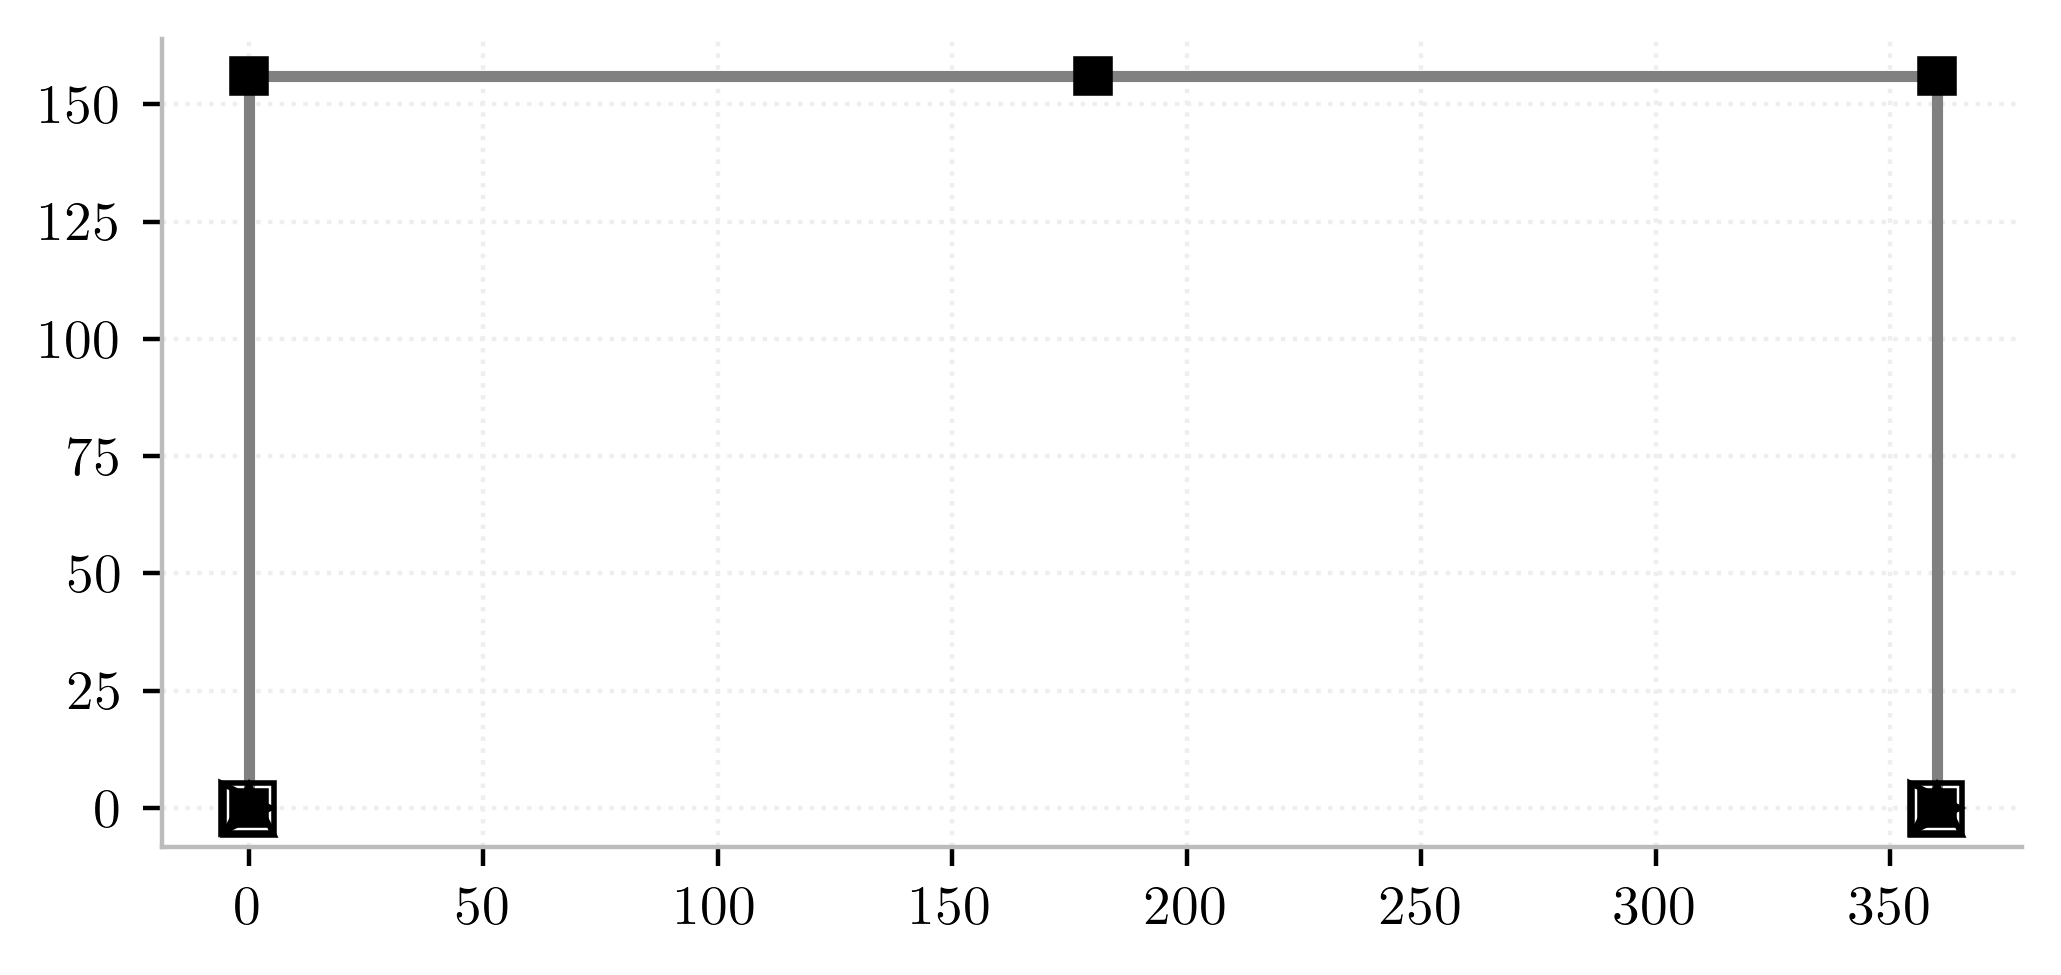

In [4]:
# Set up nodes
ft = 12.
B, H = 30.*ft, 13.*ft
model.node("1",  0.,  0.)
model.node("2",  0.,  H )
model.node("3", B/2,  H )
model.node("4",  B ,  H )
model.node("5",  B ,  0.)

model.beam("a", "1", "2", elem=column)
model.beam("b", "2", "3", elem=girder)
model.beam("c", "3", "4", elem=girder)
model.beam("d", "4", "5", elem=column)

model.boun("1", [1,1,1])
model.boun("5", [1,1,1])

model.load("2", P1, dof="x")
model.load("2", -2.0, dof="y")
model.load("2", -2.0, dof="y")

em.plot_skeletal(model);

In [5]:
model.dofs

[[9, 10, 11], [0, 1, 2], [3, 4, 5], [6, 7, 8], [12, 13, 14]]

In [6]:
f = model.compose_displ()

In [7]:
model.cycle(0, 0, 3000, 100,4,0)
P = model.build_load_path(0)

In [8]:
F = elle.numeric.accumulate(f)

In [ ]:
X, Y, S = F(P)

0/396
1/396
2/396
3/396
4/396
5/396
6/396
7/396
8/396
9/396
10/396
11/396
12/396
13/396
14/396
15/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


16/396
17/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


18/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


19/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


20/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


21/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


22/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


23/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


24/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


25/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


26/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


27/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


28/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


29/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


30/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


31/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


32/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


33/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


34/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


35/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


36/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


37/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


38/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


39/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


40/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


41/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


42/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


43/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


44/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


45/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


46/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


47/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


48/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


49/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


50/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


51/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


52/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


53/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


54/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


55/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


56/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


57/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


58/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


59/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


60/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


61/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


62/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


63/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


64/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


65/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


66/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


67/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


68/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


69/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


70/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


71/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


72/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


73/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


74/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


75/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


76/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


77/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


78/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


79/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


80/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


81/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


82/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


83/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


84/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


85/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


86/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


87/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


88/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


89/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


90/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


91/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


92/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


93/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


94/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


95/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


96/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


97/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


98/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


99/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


100/396
101/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


102/396
103/396
104/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


105/396
106/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


107/396
108/396
109/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


110/396
111/396
112/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


113/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


114/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


115/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


116/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


117/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


118/396
119/396
120/396
121/396
122/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


123/396
124/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


125/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


126/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


127/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


128/396
129/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


130/396
131/396
132/396
133/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


134/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


135/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


136/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


137/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


138/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


139/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


140/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


141/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


142/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


143/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


144/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


145/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


146/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


147/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


148/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


149/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


150/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


151/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


152/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


153/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


154/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


155/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


156/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


157/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


158/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


159/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


160/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


161/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


162/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


163/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


164/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


165/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


166/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


167/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


168/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


169/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


170/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


171/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


172/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


173/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


174/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


175/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


176/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


177/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


178/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


179/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


180/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


181/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


182/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


183/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


184/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


185/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


186/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


187/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


188/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


189/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


190/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


191/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


192/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


193/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


194/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


195/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


196/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


197/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


198/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


199/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


200/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


201/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


202/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


203/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


204/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


205/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


206/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


207/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


208/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


209/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


210/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


211/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


212/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


213/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


214/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


215/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


216/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


217/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


218/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


219/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


220/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


221/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


222/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


223/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


224/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


225/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


226/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


227/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


228/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


229/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


230/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


231/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


232/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


233/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


234/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


235/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


236/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


237/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


238/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


239/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


240/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


241/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


242/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


243/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


244/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


245/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


246/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


247/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


248/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


249/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


250/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


251/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


252/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


253/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


254/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


255/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


256/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


257/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


258/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


259/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


260/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


261/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


262/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


263/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


264/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


265/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


266/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


267/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


268/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


269/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


270/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


271/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


272/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


273/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


274/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


275/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


276/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


277/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


278/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


279/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


280/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


281/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


282/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


283/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


284/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


285/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


286/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


287/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


288/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


289/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


290/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


291/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


292/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


293/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


294/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


295/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


296/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


297/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


298/396
299/396
300/396
301/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


302/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


303/396
304/396
305/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


306/396
307/396
308/396
309/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


310/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


311/396
312/396
313/396
314/396
315/396
316/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


317/396
318/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


319/396
320/396
321/396
322/396
323/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


324/396
325/396


/home/claudio/elle/numeric/elle/numeric/inverse.py:149: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


326/396
327/396


In [ ]:
fig, ax = plt.subplots()
ax.plot(Y[:,0,:],P[:,0,:])
ax.set_title("Cyclic response of the displacement-based fiber beam")
ax.set_xlabel("$U_1$")
ax.set_ylabel("$P_1$")
fig.savefig("/home/claudio/prnt/ms-thesis/doc/img/fiber-corot-cycle.svg")

In [ ]:
anp.savez("fiber-cycle-corot.npz",P,Y)